In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise Pandas

For these exercices we are using a [dataset]() phttps://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/kernelsrovided by Airbnb for a Kaggle competition. It describes its offer for New York City in 2019, including types of appartments, price, location etc.

## 1. Create a dataframe 
Create a dataframe of a few lines with objects and their poperties (e.g fruits, their weight and colour).
Calculate the mean of your Dataframe.

In [18]:
my_df = pd.DataFrame({'fruit':['orange','banana', 'apple','cherry'],
                   'color':['orange', 'yellow', 'red', 'red'],
                   'weight':[10, 6, 5, 20]})
my_df

,fruit,color,weight
0,orange,orange,10
1,banana,yellow,6
2,apple,red,5
3,cherry,red,20


In [19]:
mean = my_df['weight'].mean()
mean

np.float64(10.25)

## 2. Import
- Import the table called ```AB_NYC_2019.csv``` as a dataframe. It is located in the Datasets folder. Have a look at the beginning of the table (head).

- Create a histogram of prices

In [3]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


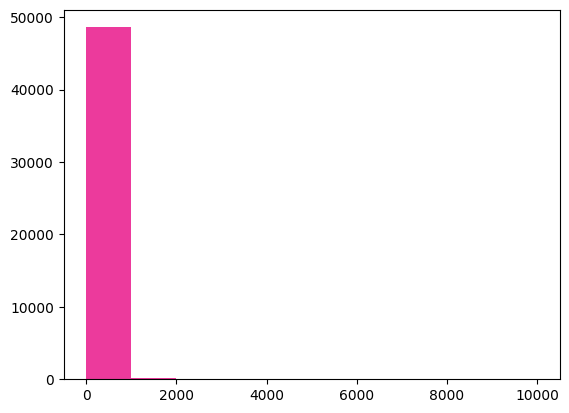

In [5]:

plt.hist(df['price'], color="#ec3a9c")



plt.show()


## 3. Operations

Create a new column in the dataframe by multiplying the "price" and "availability_365" columns to get an estimate of the maximum yearly income.

In [30]:
Annual_income = df.price * df.availability_365
df['Annual income'] = Annual_income
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,4732,2786,11950,13024,122130,24616,16089,61710,Annual_income,Annual income
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,4732,2786,11950,13024,122130,24616,16089,61710,54385,54385
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,4732,2786,11950,13024,122130,24616,16089,61710,79875,79875
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,4732,2786,11950,13024,122130,24616,16089,61710,54750,54750


In [33]:
max_income = df.Annual_income.max() 
max_income

np.int64(3649635)

## 3b. Subselection and plotting
Create a new Dataframe by first subselecting yearly incomes between 1 and 100'000. Then make a scatter plot of yearly income versus number of reviews 

In [36]:
BM = df[(df['Annual_income'] > 1) & (df['Annual_income'] < 100000)]
BM

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,4732,2786,11950,13024,122130,24616,16089,61710,Annual_income,Annual income
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,4732,2786,11950,13024,122130,24616,16089,61710,54385,54385
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,4732,2786,11950,13024,122130,24616,16089,61710,79875,79875
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,4732,2786,11950,13024,122130,24616,16089,61710,54750,54750
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,4732,2786,11950,13024,122130,24616,16089,61710,17266,17266
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,...,4732,2786,11950,13024,122130,24616,16089,61710,25800,25800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,...,4732,2786,11950,13024,122130,24616,16089,61710,630,630
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,...,4732,2786,11950,13024,122130,24616,16089,61710,1440,1440
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,...,4732,2786,11950,13024,122130,24616,16089,61710,3105,3105
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,...,4732,2786,11950,13024,122130,24616,16089,61710,110,110


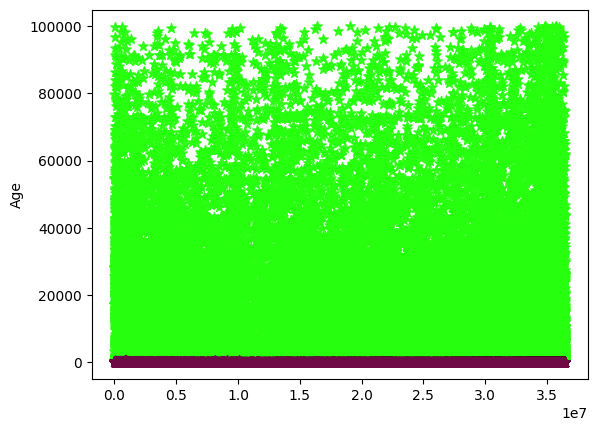

In [44]:
plt.scatter(BM.id, BM.Annual_income, color="#26ff0eec", s = 50, marker = '*')
plt.scatter(BM.id, BM.number_of_reviews,  color="#6e0946ec", s = 50, marker = '*')
plt.xlabel('')
plt.ylabel('Age')
plt.show()

## 4. Combine

We provide below and additional table that contains the number of inhabitants of each of New York's boroughs ("neighbourhood_group" in the table). Use ```merge``` to add this population information to each element in the original dataframe.

## 5. Groups

- Using ```groupby``` calculate the average price for each type of room (room_type) in each neighbourhood_group. What is the average price for an entire home in Brooklyn ?
- Unstack the multi-level Dataframe into a regular Dataframe with ```unstack()``` and create a bar plot with the resulting table


## 6. Advanced plotting

Using Seaborn, create a scatter plot where x and y positions are longitude and lattitude, the color reflects price and the shape of the marker the borough (neighbourhood_group). Can you recognize parts of new york ? Does the map make sense ?